# Neural Network

### Import library required
Library yang digunakan adalah **pandas, numpy, matplotlib, seaborn, dan sklearn**. Silahkan install terlebih dahulu jika belum menginstallnya dengan perintah `pip install nama-library`.

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

### Activation Function
Berikut beberapa activation function yang sering digunakan pada neural network

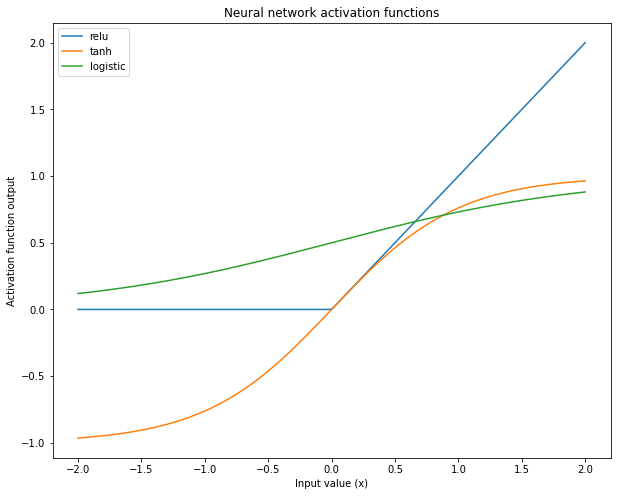

In [6]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(10, 8))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output');

### Load Data
Data yang digunakan adalah data bawaan sklearn library. Jika ingin menggunakan data sendiri silahkan pakai perintah `pd.read_csv()` atau `pd.read_excel()`

In [7]:
data = load_breast_cancer(as_frame= True)
X_cancer = data.data
y_cancer = data.target
data.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Split Data
Fungsi `train_test_split`, secara default akan membagi data menjadi 75% data training dan 25% data test. Untuk mengaturnya dapat menggunakan argument `test_size` atau `train_size`. Contoh `train_test_split(X, y, train_test = 0.8)`

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  426  | Jumlah Test Data :  143


### Transformasi Data
Hal ini dilakukan untuk mengurangi komputasi

In [9]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.30380046, 0.44854772, 0.30993021, ..., 0.70651051, 0.39818648,
        0.36639118],
       [0.29480808, 0.64481328, 0.27855711, ..., 0.20685498, 0.17327025,
        0.08421881],
       [0.33314402, 0.24688797, 0.31649506, ..., 0.28301757, 0.11255667,
        0.07910272],
       ...,
       [0.25363245, 0.10622407, 0.24289959, ..., 0.36858422, 0.30455352,
        0.13695396],
       [0.30995314, 0.05103734, 0.30488563, ..., 0.25514984, 0.22570471,
        0.11065197],
       [0.59676274, 0.35020747, 0.60058047, ..., 0.77402687, 0.40961955,
        0.24393283]])

### Make Model
Untuk mengatur jumlah layer dapat diatur menggunakan parameter `hidden_layer_sizes`. Sebagai contoh `hidden_layer_sizes = [8, 20]` berarti model yang dibuat akan menggunakan 2 hidden layer, dimana layer 1 memiliki 8 black box dan layer 2 memiliki 20 black box.
Activation function dapat di atur menggunakan parameter `activation`. Parameter tersebut dapat bernilai **relu, logistic, tanh, dan identity**
Untuk melihat parameter apa saja yang dapat diatur dapat menggunakan fungsi `help(MLPClassifier)`

In [10]:
layer_size = [8, 20]
activation_function = "relu"

clf = MLPClassifier(hidden_layer_sizes = layer_size, random_state = 0, activation = activation_function, solver = "lbfgs")
clf.fit(X_train_scaled, y_train)
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': [8, 20],
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Check Accuracy

In [11]:
print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 1.00
Accuracy of NN classifier on test set: 0.94


### Predict Test Data

In [12]:
y_pred = clf.predict(X_test_scaled)
data.target_names[y_pred]

array(['malignant', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'malignant', 'benign',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'malignant',
       'benign', 'malignant', 'benign', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'malignant', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'benign', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'malignant', 'malignant', 'benign', 'benign', 'malignant',
       'benign', 'malignant', 'malignant', 'malignant', 'benign',
       'malignant', 'malignant', 'benign', 'malignant', 'malignant',
       'benign', 'benign', 'benign', 'benign', 'benig

### Confusion Matrix

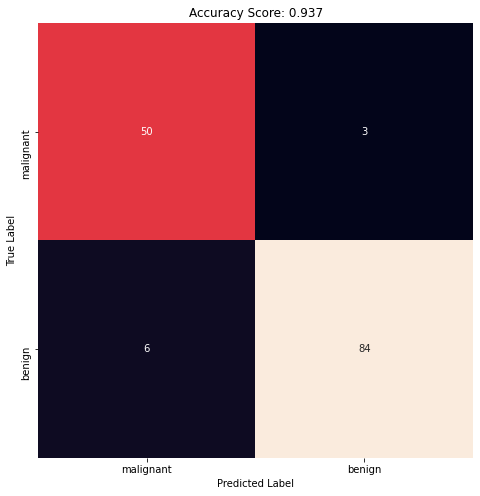

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, square=True, cbar=False, xticklabels=data.target_names, yticklabels=data.target_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Accuracy Score: {:.3}'.format(clf.score(X_test_scaled, y_test)));